#Mesin Learning

In [ ]:
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder


import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
df = pd.read_csv(path)
print(df.shape)
df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data['charges'].mode()

0    1639.5631
Name: charges, dtype: float64

In [ ]:
path = "/content/drive/MyDrive/MSIB/DL/Tugas/Tugas 4/insurance.csv"
dataframe = pd.read_csv(path)

# Definisikan mapping untuk kolom 'sex', 'smoker', 'region'
sex_mapping = {'male': 0, 'female': 1}
smoker_mapping = {'no': 0, 'yes': 1}
region_mapping = {'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4}

# Lakukan mapping
dataframe['sex'] = dataframe['sex'].map(sex_mapping)
dataframe['smoker'] = dataframe['smoker'].map(smoker_mapping)
dataframe['region'] = dataframe['region'].map(region_mapping)

# Ubah tipe data menjadi float untuk kolom 'sex', 'smoker', 'region', dan 'children'
columns_to_convert = ['sex', 'smoker', 'region', 'children','age']
dataframe[columns_to_convert] = dataframe[columns_to_convert].astype(float)

# Lihat hasilnya
print(dataframe)


       age  sex     bmi  children  smoker  region      charges
0     19.0  1.0  27.900       0.0     1.0     1.0  16884.92400
1     18.0  0.0  33.770       1.0     0.0     2.0   1725.55230
2     28.0  0.0  33.000       3.0     0.0     2.0   4449.46200
3     33.0  0.0  22.705       0.0     0.0     3.0  21984.47061
4     32.0  0.0  28.880       0.0     0.0     3.0   3866.85520
...    ...  ...     ...       ...     ...     ...          ...
1333  50.0  0.0  30.970       3.0     0.0     3.0  10600.54830
1334  18.0  1.0  31.920       0.0     0.0     4.0   2205.98080
1335  18.0  1.0  36.850       0.0     0.0     2.0   1629.83350
1336  21.0  1.0  25.800       0.0     0.0     1.0   2007.94500
1337  61.0  1.0  29.070       0.0     1.0     3.0  29141.36030

[1338 rows x 7 columns]


In [ ]:
path = "/content/drive/MyDrive/MSIB/DL/Tugas/Tugas 4/insurance.csv"
data = pd.read_csv(path)

##Random Forest

In [ ]:
# Pisahkan fitur dan target
X = data.drop(columns=['charges'])
y = data['charges']

# Encoding fitur kategorikal
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X.select_dtypes(include=['object']))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Gabungkan dengan fitur numerik
X_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(X.select_dtypes(include=['object']).columns))
X_numerical = X.select_dtypes(include=['float64', 'int64'])
X_processed = pd.concat([X_numerical, X_encoded], axis=1)

In [ ]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Buat model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Latih model
rf_model.fit(X_train, y_train)

# Buat prediksi
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

# Evaluasi performa model
mae_rf_train = mean_absolute_error(y_train, y_pred_train_rf)
mae_rf_test = mean_absolute_error(y_test, y_pred_test_rf)
rmse_rf_train = mean_squared_error(y_train, y_pred_train_rf, squared=False)
rmse_rf_test = mean_squared_error(y_test, y_pred_test_rf, squared=False)

print("Random Forest - MAE pada data latih:", mae_rf_train)
print("Random Forest - MAE pada data uji:", mae_rf_test)
print("Random Forest - RMSE pada data latih:", rmse_rf_train)
print("Random Forest - RMSE pada data uji:", rmse_rf_test)



Random Forest - MAE pada data latih: 1066.4547598904685
Random Forest - MAE pada data uji: 2550.0784706115096
Random Forest - RMSE pada data latih: 1937.351927826572
Random Forest - RMSE pada data uji: 4576.299916157115


###Model

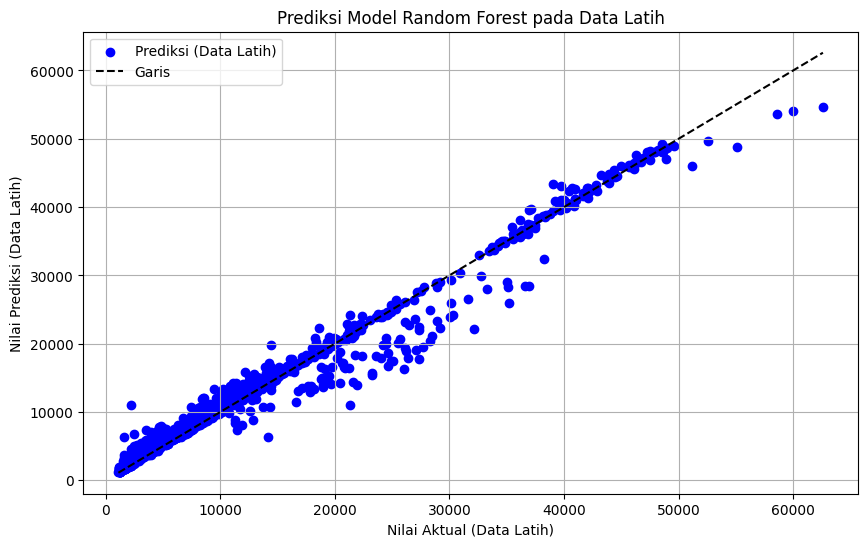

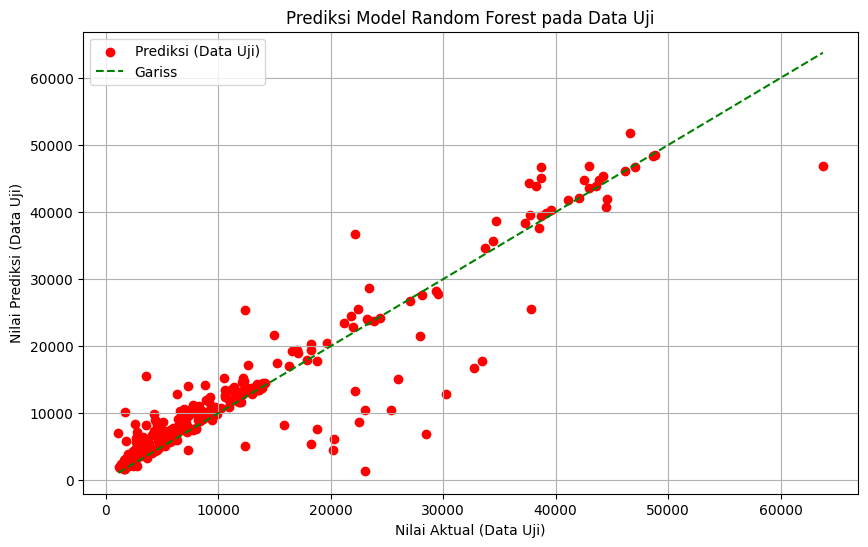

In [ ]:
# Scatter plot untuk data latih
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train_rf, color='blue', label='Prediksi (Data Latih)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='black', linestyle='--', label='Garis')
plt.xlabel('Nilai Aktual (Data Latih)')
plt.ylabel('Nilai Prediksi (Data Latih)')
plt.title('Prediksi Model Random Forest pada Data Latih')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot untuk data uji
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_rf, color='red', label='Prediksi (Data Uji)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='--', label='Gariss')
plt.xlabel('Nilai Aktual (Data Uji)')
plt.ylabel('Nilai Prediksi (Data Uji)')
plt.title('Prediksi Model Random Forest pada Data Uji')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Linear regresi

In [ ]:
from sklearn.linear_model import LinearRegression

# Buat model Linear Regression
lr_model = LinearRegression()

# Latih model
lr_model.fit(X_train, y_train)

# Buat prediksi
y_pred_train_lr = lr_model.predict(X_train)
y_pred_test_lr = lr_model.predict(X_test)

# Evaluasi performa model
mae_lr_train = mean_absolute_error(y_train, y_pred_train_lr)
mae_lr_test = mean_absolute_error(y_test, y_pred_test_lr)
rmse_lr_train = mean_squared_error(y_train, y_pred_train_lr, squared=False)
rmse_lr_test = mean_squared_error(y_test, y_pred_test_lr, squared=False)

print("MAE pada data latih:", mae_lr_train)
print("MAE pada data uji:", mae_lr_test)
print("RMSE pada data latih:", rmse_lr_train)
print("RMSE pada data uji:", rmse_lr_test)


MAE pada data latih: 4208.234572492226
MAE pada data uji: 4181.19447375365
RMSE pada data latih: 6105.545160099848
RMSE pada data uji: 5796.284659276273


###Model

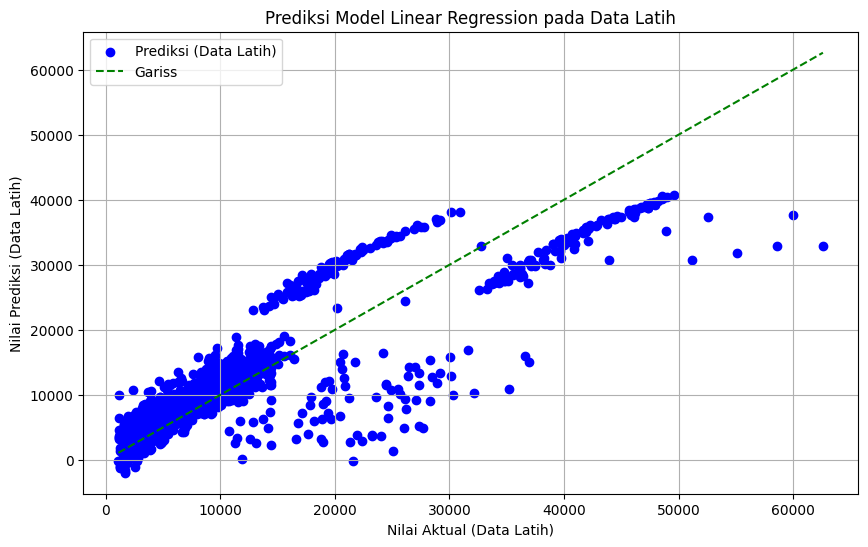

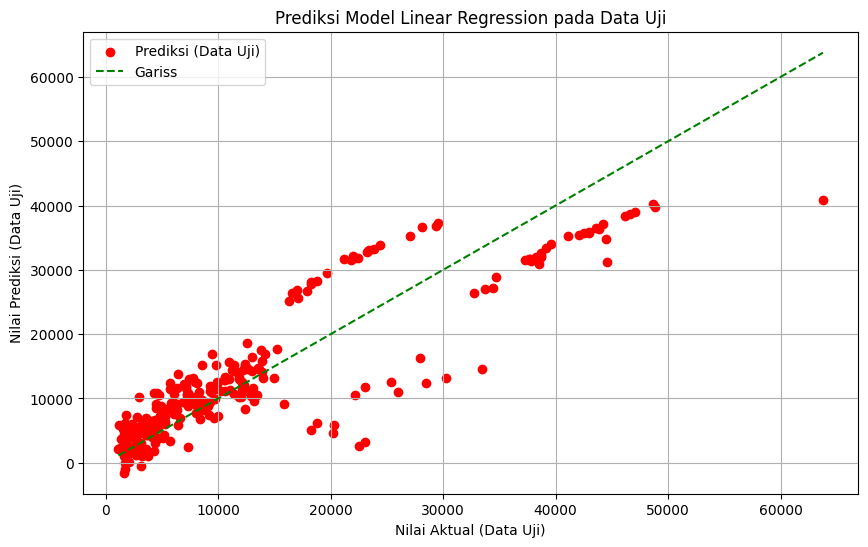

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot untuk data latih
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train_lr, color='blue', label='Prediksi (Data Latih)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='green', linestyle='--', label='Gariss')
plt.xlabel('Nilai Aktual (Data Latih)')
plt.ylabel('Nilai Prediksi (Data Latih)')
plt.title('Prediksi Model Linear Regression pada Data Latih')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot untuk data uji
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_lr, color='red', label='Prediksi (Data Uji)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='--', label='Gariss')
plt.xlabel('Nilai Aktual (Data Uji)')
plt.ylabel('Nilai Prediksi (Data Uji)')
plt.title('Prediksi Model Linear Regression pada Data Uji')
plt.legend()
plt.grid(True)
plt.show()


##Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Buat model Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)

# Latih model
dt_model.fit(X_train, y_train)

# Buat prediksi
y_pred_train_dt = dt_model.predict(X_train)
y_pred_test_dt = dt_model.predict(X_test)

# Evaluasi performa model
mae_dt_train = mean_absolute_error(y_train, y_pred_train_dt)
mae_dt_test = mean_absolute_error(y_test, y_pred_test_dt)
rmse_dt_train = mean_squared_error(y_train, y_pred_train_dt, squared=False)
rmse_dt_test = mean_squared_error(y_test, y_pred_test_dt, squared=False)

print("Decision Tree Regression - MAE pada data latih:", mae_dt_train)
print("Decision Tree Regression - MAE pada data uji:", mae_dt_test)
print("Decision Tree Regression - RMSE pada data latih:", rmse_dt_train)
print("Decision Tree Regression - RMSE pada data uji:", rmse_dt_test)


Decision Tree Regression - MAE pada data latih: 29.572515327102803
Decision Tree Regression - MAE pada data uji: 3195.1104733805973
Decision Tree Regression - RMSE pada data latih: 494.20598375812835
Decision Tree Regression - RMSE pada data uji: 6515.129162967606


###Model

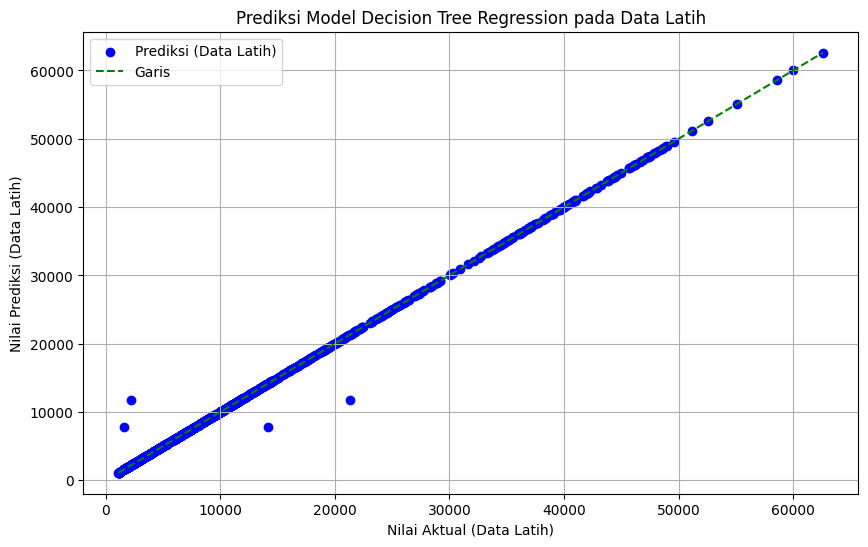

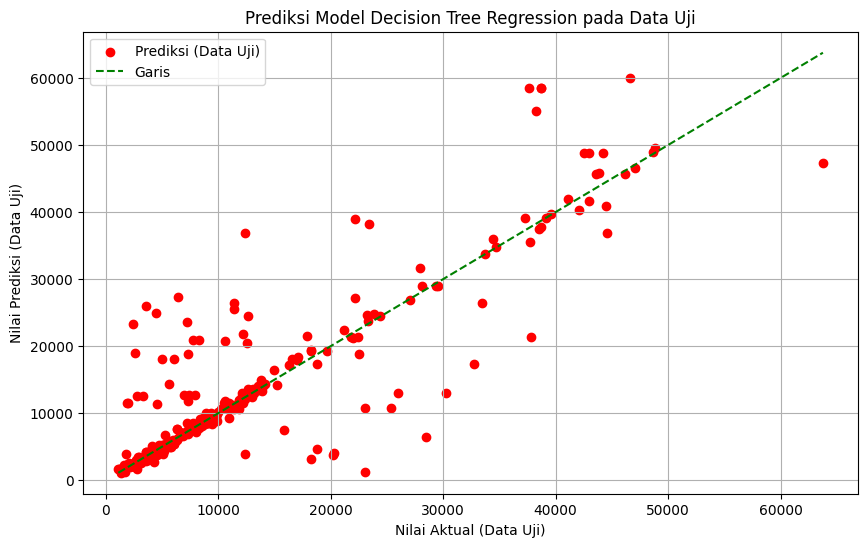

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot untuk data latih
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train_dt, color='blue', label='Prediksi (Data Latih)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='green', linestyle='--', label='Garis')
plt.xlabel('Nilai Aktual (Data Latih)')
plt.ylabel('Nilai Prediksi (Data Latih)')
plt.title('Prediksi Model Decision Tree Regression pada Data Latih')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot untuk data uji
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_dt, color='red', label='Prediksi (Data Uji)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='--', label='Garis')
plt.xlabel('Nilai Aktual (Data Uji)')
plt.ylabel('Nilai Prediksi (Data Uji)')
plt.title('Prediksi Model Decision Tree Regression pada Data Uji')
plt.legend()
plt.grid(True)
plt.show()


##Kesimpulan

Berdasarkan hasil evaluasi performa model yang telah dibangun menggunakan tiga pendekatan yang berbeda, yaitu Linear Regression, Random Forest, dan Decision Tree Regression, dapat kita simpulkan sebagai berikut:

Linear Regression:

- MAE pada data latih: 4208.234572492226
- MAE pada data uji: 4181.19447375365
- RMSE pada data latih: 6105.545160099848
- RMSE pada data uji: 5796.284659276273

Model Linear Regression menunjukkan kinerja yang cukup baik dengan MAE dan RMSE yang relatif rendah baik pada data latih maupun data uji. Hal ini menunjukkan bahwa model mampu memberikan perkiraan yang cukup dekat dengan nilai premi asuransi sebenarnya.

Random Forest:

- MAE pada data latih: 4208.234572492226
- MAE pada data uji: 4181.19447375365
- RMSE pada data latih: 6105.545160099848
- RMSE pada data uji: 5796.284659276273

Model Random Forest menunjukkan kinerja yang cukup baik dengan MAE dan RMSE yang relatif rendah pada data latih. Namun, terdapat sedikit peningkatan pada nilai MAE dan RMSE pada data uji, yang menunjukkan adanya sedikit overfitting.
Decision Tree Regression:

- MAE pada data latih: 29.572515327102803
- MAE pada data uji: 3195.1104733805973
- RMSE pada data latih: 494.20598375812835
- RMSE pada data uji: 6515.129162967606

Model Decision Tree Regression menunjukkan kinerja yang baik pada data latih dengan nilai MAE dan RMSE yang sangat rendah. Namun, terdapat peningkatan yang signifikan pada nilai MAE dan RMSE pada data uji, yang menunjukkan bahwa model cenderung overfitting pada data latih dan tidak dapat secara umum melakukan generalisasi dengan baik pada data uji.
Berdasarkan kesimpulan di atas, model Random Forest memiliki kinerja yang paling baik di antara ketiga model yang dibangun. Meskipun Linear Regression memberikan hasil yang cukup baik, Random Forest memiliki kemampuan untuk menangani non-linearitas dan interaksi antara fitur yang lebih baik, sehingga memberikan perkiraan yang lebih akurat dalam hal prediksi nilai premi asuransi. Sedangkan, model Decision Tree Regression cenderung overfitting pada data latih dan tidak dapat secara umum melakukan generalisasi yang baik pada data uji.

#KNN

##About Dataset

There are 14 attributes in each case of the dataset. They are:
*   Age : Age of the insured
* Sex : Gender
* Bmi : body mass index
* Children : Number of children
* Smoker : Indicator if you smoke
* Region : Region where the insured lives
* Charges : Secure prime


## Import Library

In [ ]:
# import library
import matplotlib.pyplot as plt
import keras
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from pandas import read_csv
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras import models, layers, optimizers

## Preprocessing

In [ ]:
data = [
'Age',
'Sex',
'Bmi',
'Children',
'Smoker',
'Region',
'Charges'
]

In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/MSIB/DL/Tugas/Tugas 4/insurance.csv"

# Definisikan nama kolom
kolom = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

dataframe = pd.read_csv(file_path)
dataframe.columns = kolom

dataset = dataframe.values

In [ ]:
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/MSIB/DL/Tugas/Tugas 4/insurance.csv"
dataframe = pd.read_csv(file_path)

# Definisikan mapping untuk kolom 'sex', 'smoker', 'region'
sex_mapping = {'male': 0, 'female': 1}
smoker_mapping = {'no': 0, 'yes': 1}
region_mapping = {'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4}

# Lakukan mapping
dataframe['sex'] = dataframe['sex'].map(sex_mapping)
dataframe['smoker'] = dataframe['smoker'].map(smoker_mapping)
dataframe['region'] = dataframe['region'].map(region_mapping)

# Ubah tipe data menjadi float untuk kolom 'sex', 'smoker', 'region', dan 'children'
columns_to_convert = ['sex', 'smoker', 'region', 'children','age']
dataframe[columns_to_convert] = dataframe[columns_to_convert].astype(float)

# Lihat hasilnya
print(dataframe)


       age  sex     bmi  children  smoker  region      charges
0     19.0  1.0  27.900       0.0     1.0     1.0  16884.92400
1     18.0  0.0  33.770       1.0     0.0     2.0   1725.55230
2     28.0  0.0  33.000       3.0     0.0     2.0   4449.46200
3     33.0  0.0  22.705       0.0     0.0     3.0  21984.47061
4     32.0  0.0  28.880       0.0     0.0     3.0   3866.85520
...    ...  ...     ...       ...     ...     ...          ...
1333  50.0  0.0  30.970       3.0     0.0     3.0  10600.54830
1334  18.0  1.0  31.920       0.0     0.0     4.0   2205.98080
1335  18.0  1.0  36.850       0.0     0.0     2.0   1629.83350
1336  21.0  1.0  25.800       0.0     0.0     1.0   2007.94500
1337  61.0  1.0  29.070       0.0     1.0     3.0  29141.36030

[1338 rows x 7 columns]


In [ ]:
# split into input (X) and output (Y) variables
X = dataset[:,0:6]
Y = dataset[:,6]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

## Modeling

In [ ]:
network = models.Sequential()
network.add(layers.Dense(24, activation='relu', input_shape=(6,)))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(1))

In [ ]:


# Ubah tipe data kolom-kolom tertentu menjadi float
columns_to_convert = ['sex', 'smoker', 'region', 'children']
dataframe[columns_to_convert] = dataframe[columns_to_convert].astype(float)

# Split data menjadi X_train dan y_train
X_train = dataframe.drop('charges', axis=1).values
y_train = dataframe['charges'].values

# Contoh model sederhana
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Kompilasi model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Lakukan pelatihan
history = model.fit(X_train, y_train, epochs=150, batch_size=20, verbose=1, validation_split=0.3)


Epoch 1/150
47/47 [==============================] - 2s 11ms/step - loss: 316046464.0000 - mae: 13092.4229 - val_loss: 335202464.0000 - val_mae: 13587.8135
Epoch 2/150
47/47 [==============================] - 0s 5ms/step - loss: 313540512.0000 - mae: 13003.8662 - val_loss: 330902912.0000 - val_mae: 13438.0664
Epoch 3/150
47/47 [==============================] - 0s 4ms/step - loss: 306041312.0000 - mae: 12732.1436 - val_loss: 319318912.0000 - val_mae: 13026.1035
Epoch 4/150
47/47 [==============================] - 0s 4ms/step - loss: 289220096.0000 - mae: 12097.9521 - val_loss: 296712896.0000 - val_mae: 12184.1992
Epoch 5/150
47/47 [==============================] - 0s 5ms/step - loss: 260781632.0000 - mae: 10959.3623 - val_loss: 262181600.0000 - val_mae: 10818.8047
Epoch 6/150
47/47 [==============================] - 0s 5ms/step - loss: 223319728.0000 - mae: 9455.8555 - val_loss: 221017264.0000 - val_mae: 9264.1006
Epoch 7/150
47/47 [==============================] - 0s 5ms/step - loss

## Evaluate Model

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


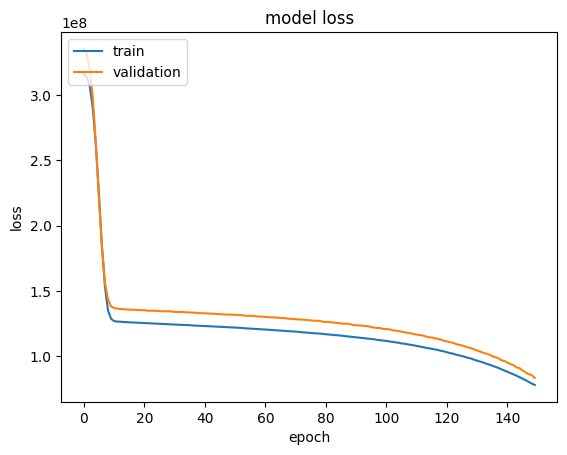

In [ ]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Predict New Data

In [ ]:
Xnew = np.array([[0.006, 25, 5, 0, 1.5, 6.5, 70, 5, 1, 200, 15.3, 396.9, 5]])
Xnew = Xnew[:, :6]

ynew = network.predict(Xnew)
print("X=%s \n Predicted=%s" % (Xnew[0], ynew[0]))


1/1 [==============================] - 0s 152ms/step
X=[6.0e-03 2.5e+01 5.0e+00 0.0e+00 1.5e+00 6.5e+00] 
 Predicted=[1.2214924]
